In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import set_config

set_config(print_changed_only=False)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


<h1 style='color:blue' align='center'>Random Forest </h1>
<img src='./data/randomforest.jpg' width=1000 height=700>

**Digits dataset from sklearn**

In [2]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 720x480 with 0 Axes>

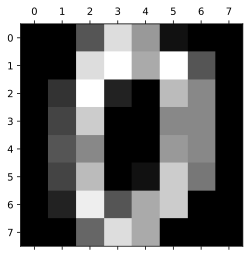

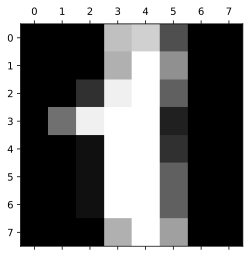

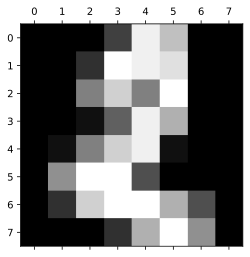

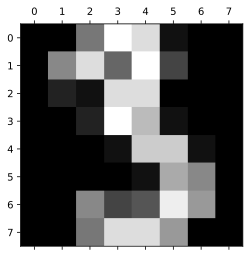

In [4]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i]) 

In [5]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.00,0.00,5.00,13.00,9.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,6.00,13.00,10.00,0.00,0.00,0.00
1,0.00,0.00,0.00,12.00,13.00,5.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,11.00,16.00,10.00,0.00,0.00
2,0.00,0.00,0.00,4.00,15.00,12.00,0.00,0.00,0.00,0.00,...,5.00,0.00,0.00,0.00,0.00,3.00,11.00,16.00,9.00,0.00
3,0.00,0.00,7.00,15.00,13.00,1.00,0.00,0.00,0.00,8.00,...,9.00,0.00,0.00,0.00,7.00,13.00,13.00,9.00,0.00,0.00
4,0.00,0.00,0.00,1.00,11.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.00,16.00,4.00,0.00,0.00


In [6]:
df['target'] = digits.target

In [7]:
df[0:12]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.00,0.00,5.00,13.00,9.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,6.00,13.00,10.00,0.00,0.00,0.00,0
1,0.00,0.00,0.00,12.00,13.00,5.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,11.00,16.00,10.00,0.00,0.00,1
2,0.00,0.00,0.00,4.00,15.00,12.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,3.00,11.00,16.00,9.00,0.00,2
3,0.00,0.00,7.00,15.00,13.00,1.00,0.00,0.00,0.00,8.00,...,0.00,0.00,0.00,7.00,13.00,13.00,9.00,0.00,0.00,3
4,0.00,0.00,0.00,1.00,11.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,2.00,16.00,4.00,0.00,0.00,4
5,0.00,0.00,12.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,9.00,16.00,16.00,10.00,0.00,0.00,5
6,0.00,0.00,0.00,12.00,13.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,9.00,15.00,11.00,3.00,0.00,6
7,0.00,0.00,7.00,8.00,13.00,16.00,15.00,1.00,0.00,0.00,...,0.00,0.00,0.00,13.00,5.00,0.00,0.00,0.00,0.00,7
8,0.00,0.00,9.00,14.00,8.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,11.00,16.00,15.00,11.00,1.00,0.00,8
9,0.00,0.00,11.00,12.00,0.00,0.00,0.00,0.00,0.00,2.00,...,0.00,0.00,0.00,9.00,12.00,13.00,3.00,0.00,0.00,9


**Train and the model and prediction**

In [8]:
X = df.drop('target', axis='columns')
y = df.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [10]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [11]:
model.score(X_test, y_test)

0.9555555555555556

In [12]:
y_predicted = model.predict(X_test)

**Confusion Matrix**

In [13]:
cm = confusion_matrix(y_test, y_predicted) # (row, column) --> (y_axis, x_axis)
cm
cm[0, 0]

array([[30,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 42,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  1],
       [ 0,  2,  2,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 31]], dtype=int64)

30

<Figure size 1200x840 with 0 Axes>

<AxesSubplot:>

Text(0.5, 71.66666666666666, 'Predicted')

Text(116.66666666666667, 0.5, 'Truth')

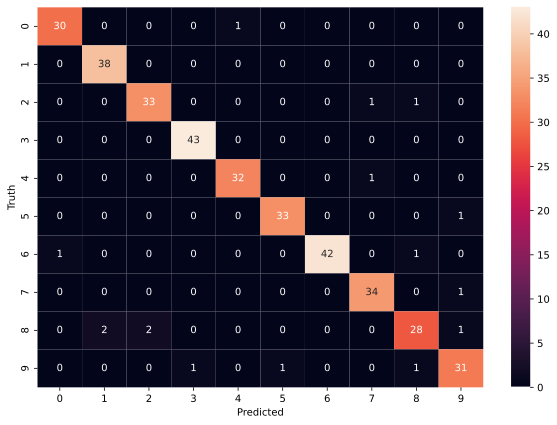

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**When you get the confusion_matrix, the X axis tick labels are 1, 0 and Y axis tick labels are 0, 1 (in the axis values increasing order). If the classifier is clf, you can get the class order by clf.classes_, which should match ["health", "business"] in this case. (It is assumed that business is the positive class).**

<AxesSubplot:>

Text(0.5, 26.666666666666668, 'Predicted labels')

Text(56.666666666666664, 0.5, 'True labels')

Text(0.5, 1.0, 'Confusion Matrix')

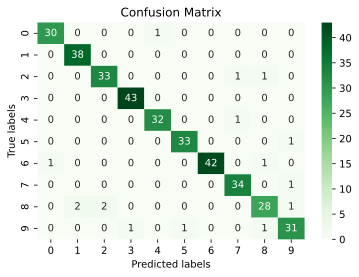

In [15]:
ax= plt.subplot()
sns.heatmap(cm, 
            annot=True, 
            fmt='g', # ftm='g' to disable scientific notation
            cmap='Greens', 
            ax=ax);  # annot=True to annotate cells, 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

## Exercise

<img src='./data/iris_petal_sepal.png' width=200 height='100'/>

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.
1. Measure prediction score using default n_estimators (10)
2. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [16]:
from sklearn.datasets import load_iris

iris=load_iris()

In [17]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [18]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20
...,...,...,...,...
145,6.70,3.00,5.20,2.30
146,6.30,2.50,5.00,1.90
147,6.50,3.00,5.20,2.00
148,6.20,3.40,5.40,2.30


In [21]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0
3,4.60,3.10,1.50,0.20,0
4,5.00,3.60,1.40,0.20,0
...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,2
146,6.30,2.50,5.00,1.90,2
147,6.50,3.00,5.20,2.00,2
148,6.20,3.40,5.40,2.30,2


In [22]:
X=df.drop('target', axis='columns')
y=df['target']

X
y

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20
...,...,...,...,...
145,6.70,3.00,5.20,2.30
146,6.30,2.50,5.00,1.90
147,6.50,3.00,5.20,2.00
148,6.20,3.40,5.40,2.30


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [23]:
X.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [25]:
clf=RandomForestClassifier()

In [26]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [27]:
y_predicted=clf.predict(X_test)

In [28]:
clf.score(X_test, y_test)

0.9666666666666667

<AxesSubplot:>

Text(0.5, 26.666666666666668, 'Pedicted')

Text(56.666666666666664, 0.5, 'True')

Text(0.5, 1.05, 'Confusion Matirx')

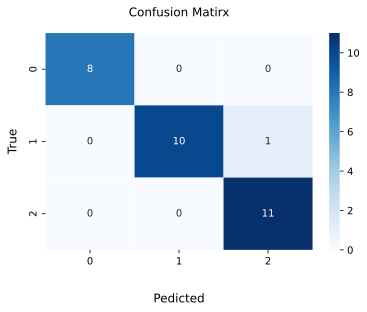

In [29]:
cm=confusion_matrix(y_test, y_predicted)


ax=plt.subplot()
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Pedicted', fontsize=12)
ax.xaxis.set_label_coords(0.5, -0.2)
ax.set_ylabel('True', fontsize=12)
ax.set_title('Confusion Matirx', y=1.05)
ax.yaxis.set_label_coords(-0.1, 0.5)



<AxesSubplot:>

Text(0.5, 26.666666666666668, 'Pedicted')

Text(56.666666666666664, 0.5, 'True')

Text(0.5, 1.05, 'Confusion Matirx')

[Text(0.5, 0, 'Setosa'), Text(1.5, 0, 'Versicolor'), Text(2.5, 0, 'Verginica')]

[Text(0, 0.5, 'Setosa'), Text(0, 1.5, 'Versicolor'), Text(0, 2.5, 'Verginica')]

[Text(0.5, 0, 'Setosa'), Text(1.5, 0, 'Versicolor'), Text(2.5, 0, 'Verginica')]


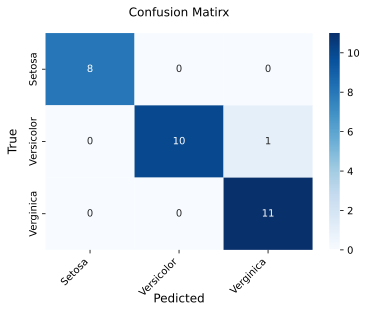

In [30]:
cm=confusion_matrix(y_test, y_predicted)

ax=plt.subplot()
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Pedicted', fontsize=12)
ax.xaxis.set_label_coords(0.5, -0.2)
ax.set_ylabel('True', fontsize=12)
ax.set_title('Confusion Matirx', y=1.05)
ax.yaxis.set_label_coords(-0.1, 0.5)

ax.set_xticklabels(['Setosa', 'Versicolor', 'Verginica'], rotation=45, ha='right')
ax.set_yticklabels(['Setosa', 'Versicolor', 'Verginica'])


print(ax.get_xticklabels())

# for label in ax.get_xticklabels():
#     label.set_rotation(45)
#     label.set_ha('right')

In [31]:
clf=RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=5, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

0.9666666666666667

In [32]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

0.9666666666666667

In [33]:
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

0.9666666666666667

In [34]:
clf=RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

0.9666666666666667